In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [191]:
df = pd.read_csv('gold_silver_price.csv')
# df.dropna(inplace=True)

# Q1

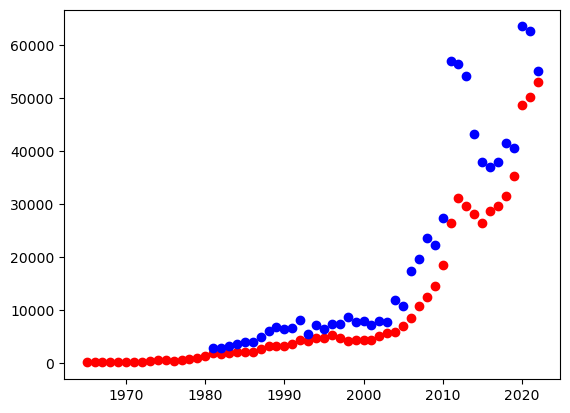

In [192]:
plt.scatter(df['Year'], df['Gold'], color='r')
plt.scatter(df['Year'], df['Silver'], color='b')

In [193]:
sum_x = sum(df['Year'])
sum_y = sum(df['Gold'])
sum_x2 = sum(df['Year']**2)
sum_x3 = sum(df['Year']**3)
sum_x4 = sum(df['Year']**4)
sum_x5 = sum(df['Year']**5)
sum_x6 = sum(df['Year']**6)

sum_yx = sum(df['Year']*df['Gold'])
sum_yx2 = sum(df['Gold']*df['Year']**2)
sum_yx3 = sum(df['Gold']*df['Year']**3)

In [194]:
coeff_mat = np.array([[len(df['Year']), sum_x, sum_x2], [sum_x, sum_x2, sum_x3], [sum_x2, sum_x3, sum_x4]])
res_mat = np.array([[sum_y], [sum_yx], [sum_yx2]])
print(coeff_mat)
print(res_mat)

[[             58          115623       230510705]
 [         115623       230510705    459587897109]
 [      230510705    459587897109 916382269292381]]
[[       584111]
 [   1175402652]
 [2365311315734]]


In [195]:
y_poly = np.linalg.inv(coeff_mat).dot(res_mat)
y_poly

array([[ 1.06752687e+08],
       [-1.07773652e+05],
       [ 2.72006511e+01]])

In [196]:
df['Gold_predict_poly'] = y_poly[0][0] + y_poly[1][0]*df['Year'] + y_poly[2][0]*df['Year']**2

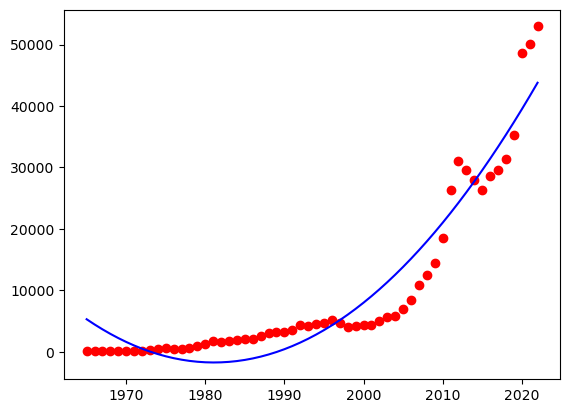

In [197]:
plt.scatter(df['Year'], df['Gold'], color='r')
plt.plot(df['Year'], df['Gold_predict_poly'], color='b')

# Q2

In [198]:
x = df['Gold']
y = df['Truth']

x = (x - x.min())/(x.max() - x.min())

In [199]:
def s(x):
    return 1/(1+np.exp(-x))

b0 = 0.0
b1 = 0.0
alpha = 0.01

for i in range(1000):
    for x_, y_ in zip(x,y):
        z = b0 + b1*x_
        pred = s(z)
    
        delta = pred - y_
    
        b0 -= alpha*delta
        b1 -= alpha*delta*x_
        
print(f'B0: {b0}, B1: {b1}')

B0: -0.43062863143438274, B1: 10.829604227720015


In [200]:
pred =[round(s(b0 + b1*x_)) for x_ in x ]

In [201]:
cm = confusion_matrix(y, pred)
cm

array([[21,  0],
       [ 1, 36]])

# Q3

In [202]:
df.dropna(inplace=True)
X = df[['Year', 'Gold']]
y = df['Silver']

In [203]:
degree = 3
poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(X)
poly_model.fit(poly_x_values, y)

PolynomialFeatures(degree=3)

In [204]:
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y)

y_pred = regression_model.predict(poly_x_values)

print(regression_model.coef_)
print(mean_squared_error(y, y_pred, squared=False))

[ 0.00000000e+00 -1.74670699e+01 -1.28050390e+04 -3.15351931e+01
  1.29500906e+01 -4.09837864e-03  1.05712294e-02 -3.27351240e-03
  2.09723447e-06 -1.21472907e-09]
2043.0190107729397


# Q4

In [215]:
x4_1 = df['Year']
x4_2 = df['Gold']
y = df['Truth']

x4_1 = (x4_1 - x4_1.min())/(x4_1.max() - x4_1.min())
x4_2 = (x4_2 - x4_2.min())/(x4_2.max() - x4_2.min())

In [216]:
b0 = 0.0
b1 = 0.0
b2 = 0.0
alpha = 0.01

for i in range(1000):
    for x1_, x2_, y_ in zip(x4_1, x4_2, y):
        z = b0 + b1*x1_ + b2*x2_
        pred = s(z)
    
        delta = pred - y_
    
        b0 -= alpha*delta
        b1 -= alpha*delta*x1_
        b2 -= alpha*delta*x2_
        
print(f'B0: {b0}, B1: {b1}, B2: {b2}')

B0: -0.4492986446357172, B1: 8.100050514297191, B2: 2.1983490495978


In [217]:
pred_4 =[round(s(b0 + b1*x1_ +b2*x2_)) for x1_, x2_ in zip(x4_1, x4_2)]

In [218]:
cm = confusion_matrix(y, pred_4)
cm

array([[ 3,  2],
       [ 0, 37]])